In [1]:
import pandas as pd
import numpy as np
import networkx as nx
#from nxviz import CircosPlot

In [2]:
mcleod = pd.read_csv('C:/Users/sujitk/OneDrive - Tom McLeod Software, Inc/market_pairs.csv')
mcleod = mcleod.dropna()

In [51]:
grouped_market = mcleod.groupby(['origin_market_id','dest_market_id']).agg({'pay_distance':'count'})

In [52]:
grouped_market= grouped_market.reset_index()

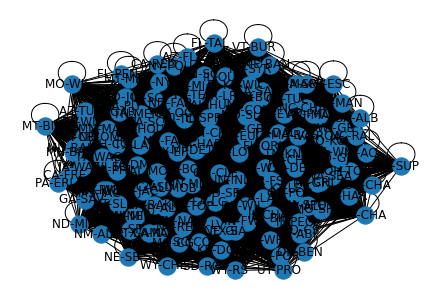

In [53]:
G = nx.Graph()
G = nx.from_pandas_edgelist(grouped_market,'origin_market_id','dest_market_id',edge_attr="pay_distance")
nx.draw(G,with_labels = True)

In [54]:
degree_values = dict(G.degree())
dv = pd.DataFrame.from_dict(degree_values,orient = 'index').reset_index()

cliques = nx.find_cliques(G)
print(len(list(cliques)))

deg_cent = nx.degree_centrality(G)
max_dc = max(deg_cent.values())
prolific_market = [[n,dc] for n, dc in deg_cent.items() if dc == max_dc]

184999


In [55]:
#prolific_market
dv.sort_values(by = 0,ascending = False )

,index,0
67,MO-KC,146
36,IL-CHI,146
118,TX-DAL,146
112,TN-CHA,146
120,TX-HOU,146
...,...,...
144,WY-RS,102
80,NE-SB,100
70,MO-WIL,99
25,FL-TAL,99


In [2]:
dv

NameError: name 'dv' is not defined

In [1]:

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G.subgraph(largest_clique)

NameError: name 'nx' is not defined

This is a separator


In [40]:
G_lc

In [ ]:


from node2vec import Node2Vec
node2vec = Node2Vec(G, dimensions=2, walk_length=20, num_walks=10,workers=4)
# Learn embeddings 
model = node2vec.fit(window=10, min_count=1)
#model.wv.most_similar('1')
model.wv.save_word2vec_format("embedding.txt")
X = model.wv

from sklearn.cluster import KMeans
import numpy as np
X = np.loadtxt("embedding.txt", dtype = {
    'names':('market','x1','x2'),
    'formats':('S1','f4','f4')
    }) # load the embedding of the nodes of the graph
#print(X)
# sort the embedding based on node index in the first column in X
X = pd.DataFrame(X)
X=X[X[:,0].argsort()] 
#print(X)
Z=X[0:X.shape[0],1:X.shape[1]]; # remove the node index from X and save in Z

kmeans = KMeans(n_clusters=2, random_state=0).fit(Z) # apply kmeans on Z
labels=kmeans.labels_  # get the cluster labels of the nodes.
print(labels)